In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Preprocess the data

In [ ]:
import zipfile
# Path to the zip file
zip_file_path = '/content/DogCat.zip'
# Directory where the files will be extracted
extract_to = '/content/'
# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extract_to)

In [ ]:
DIRECTORY = r"/content/DogCat/training_set"
CATEGORY =['cats','dogs']

In [ ]:
for category in CATEGORY:
  folder = os.path.join(DIRECTORY,category)
  print(folder)

/content/DogCat/training_set/cats
/content/DogCat/training_set/dogs


In [ ]:
for category in CATEGORY:
  folder = os.path.join(DIRECTORY,category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    print(img_path)

Streaming output truncated to the last 5000 lines.
/content/DogCat/training_set/cats/cat.3375.jpg
/content/DogCat/training_set/cats/cat.1496.jpg
/content/DogCat/training_set/cats/cat.2443.jpg
/content/DogCat/training_set/cats/cat.2102.jpg
/content/DogCat/training_set/cats/cat.947.jpg
/content/DogCat/training_set/cats/cat.3915.jpg
/content/DogCat/training_set/cats/cat.1224.jpg
/content/DogCat/training_set/cats/cat.3031.jpg
/content/DogCat/training_set/cats/cat.1109.jpg
/content/DogCat/training_set/cats/cat.3588.jpg
/content/DogCat/training_set/cats/cat.995.jpg
/content/DogCat/training_set/cats/cat.1871.jpg
/content/DogCat/training_set/cats/cat.3748.jpg
/content/DogCat/training_set/cats/cat.1519.jpg
/content/DogCat/training_set/cats/cat.2350.jpg
/content/DogCat/training_set/cats/cat.3298.jpg
/content/DogCat/training_set/cats/cat.390.jpg
/content/DogCat/training_set/cats/cat.243.jpg
/content/DogCat/training_set/cats/cat.2472.jpg
/content/DogCat/training_set/cats/cat.554.jpg
/content/DogCa

CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

In [ ]:
train_set = train_datagen.flow_from_directory(
    '/content/DogCat/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(
    '/content/DogCat/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2023 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))

In [ ]:
model.add(Dense(1,activation='sigmoid'))

model compile

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_set, validation_data=test_set, epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 214ms/step - accuracy: 0.5656 - loss: 0.6863 - val_accuracy: 0.6476 - val_loss: 0.6227
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 222ms/step - accuracy: 0.6610 - loss: 0.6159 - val_accuracy: 0.7000 - val_loss: 0.5795
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 213ms/step - accuracy: 0.7073 - loss: 0.5773 - val_accuracy: 0.6980 - val_loss: 0.5892
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 55s 217ms/step - accuracy: 0.7208 - loss: 0.5361 - val_accuracy: 0.7365 - val_loss: 0.5304
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 219ms/step - accuracy: 0.7432 - loss: 0.5165 - val_accuracy: 0.7617 - val_loss: 0.5102
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 213ms/step - accuracy: 0.7612 - loss: 0.4903 - val_accuracy: 0.7682 - val_loss: 0.4949
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 221ms/step - accuracy: 0.7669 - loss: 0.4730 - val_accuracy: 0.7731 - val_loss: 0.4841
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 55s 215ms/step - accuracy: 0.7724 - loss: 0.4730 - val

In [ ]:
# Access history metrics
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

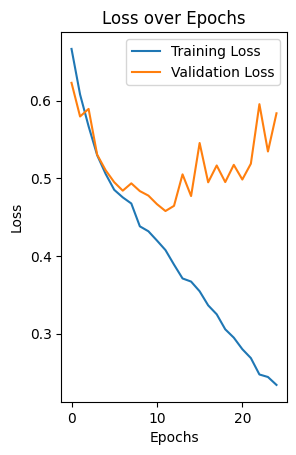

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_img = image.load_img('/content/DogCat/test_set/cats/cat.4163.jpg',target_size=(64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
train_set.class_indices
if result[0][0] == 1:
  prediction = 'Dog'
else:
  prediction = 'Cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:
print(prediction)

Cat


In [ ]:
train_loss, train_accuracy = model.evaluate(train_set)
print(f"Test Loss: {train_loss}")
print(f"Test Accuracy: {train_accuracy}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.9105 - loss: 0.2157
Test Loss: 0.20863588154315948
Test Accuracy: 0.9155527949333191


In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7919 - loss: 0.5882
Test Loss: 0.583579421043396
Test Accuracy: 0.799802303314209


In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)